# **Predicting Customer Churn: A Machine Learning Approach**

# **Business Understanding**

In today's fast-paced telecommunications landscape, customer churn presents an ongoing obstacle for companies striving for enduring success. With customers having a multitude of options and ever-evolving preferences, accurately predicting churn has become paramount for retaining and satisfying them. Essentially, customer churn refers to the loss of customers.
In this project, we harness the power of Supervised Machine Learning (specifically classification) to delve into the significance of churn analytics as a strategic tool for telecommunication companies. The goal is to proactively identify potential risk factors for churn, optimize retention efforts, and foster enduring customer relationships. By leveraging data-driven insights and advanced analytics, companies can gain a competitive edge and ensure sustainable growth in this dynamic industry.
The churn analytics predictive model serves as a data-driven solution tailored to tackle the persistent challenge of customer churn in subscription-based industries. This model aims to pinpoint customers at risk of churn, empowering businesses to take proactive measures and deploy targeted retention strategies.
The primary objective is to diminish customer churn rates and retain valuable customers by offering insights into customer behavior, preferences, and patterns. Employing machine learning models such as logistic regression and decision trees, the model evaluates the data to construct accurate predictions.
To gauge its effectiveness, the model's performance is assessed through key metrics like accuracy, precision, recall, and F1-score. Armed with the insights derived from the model, businesses can craft personalized offers, design marketing campaigns, and implement proactive customer support initiatives. This, in turn, enhances customer satisfaction and nurtures loyalty.
In summary, this project endeavors to leverage supervised machine learning techniques to address the challenge of customer churn in the telecommunications sector. By marrying data-driven insights with proactive strategies, it aims to equip companies with the tools needed to thrive in an ever-evolving industry landscape.
The following are the business questions to be answered at the end of the project.

## Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

### Overview
The purpose of this project is to develop a machine learning model for binary classification. The model will predict whether a given instance belongs to one of two classes based on a set of input features.

### Background
Vodafone, a telecommunication company want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be applied to avert this problem.

### Project Ojectives
- Develop and train a machine learning model using historical data to predict whether a customer will churn or not.
- Evaluate the model's performance using appropriate metrics : accuracy,precision,recall,f1-score.
- Fine-tune the model parameters with GridSearchCv to optimize performance.
- Perform hypothesis testing to reject or fail to reject the null hypothesis


### Data for the project
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Business Sucess Criteria
- Model accuracy: The model's accuracy should be above 70%
- Retention Strategy Effectiveness: The implemented retention strategies should show a measurable impact on reducing customer churn rates. This can be assessed by comparing churn rates before and after implementing the strategies.
- Cost Reduction: The model should contribute to reducing the costs associated with customer acquisition by identifying at-risk customers early on and allowing targeted retention efforts.
- Customer Satisfaction: While focusing on retention, the model and strategies should also aim to maintain or improve customer satisfaction levels. High customer satisfaction leads to increased loyalty and potentially higher customer lifetime value.
- Adaptability and Scalability: The developed model should be adaptable to changing business environments and scalable to accommodate larger datasets or additional features. This ensures its long-term viability and usefulness for the company.
- Feedback and Iteration: Continuous feedback loops should be established to gather insights from the model's predictions and refine the retention strategies accordingly. This iterative process ensures ongoing improvement and optimization of the churn prediction system.

### Future Work
Deploy the model to be used in the company's mobile/web application

### Business Questions

1. What is the proportion of customers who have churned versus those who have not churned?

2. How does the monthly charges vary between customers who have churned and those who have not?

3. How does the proportion of churn vary across different contract types (month-to-month, one year, two-year)?

4. How does the presence or absence of internet service affect customer churn rates?

5. How does the type of internet service (DSL, Fiber Optic, None) influence monthly charges and customer churn?

### Hypothesis Statement
- **Null Hypothesis (Ho)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

- **Alternative Hypothesis (Ha)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn.

# **Data Understanding**

### Library Importation

In [88]:
# data manipulation tools
import pandas as pd
import numpy as np

# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from phik import phik_matrix
import plotly.express as px

# statistics librabry
from scipy import stats
import statistics as  stat
from scipy.stats import mannwhitneyu

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline as ImbPipeline

# database connections
import pyodbc    
from dotenv import dotenv_values

# machine learning libraries
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# Evaluation 
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_curve, auc 

from sklearn.model_selection import KFold, cross_val_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

# Other packages
import os, joblib
from joblib import load


# hide warnings
import warnings
warnings.filterwarnings("ignore")


### Data Loading

#### Set up database connection

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [3]:
# setup connection
connector = pyodbc.connect(connection_string)

### Data for the project
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Data Dictionary

| Feature           | Description                                                |
|-------------------|------------------------------------------------------------|
| Gender            | Whether the customer is a male or a female                 |
| SeniorCitizen     | Whether a customer is a senior citizen or not              |
| Partner           | Whether the customer has a partner or not (Yes, No)        |
| Dependents        | Whether the customer has dependents or not (Yes, No)       |
| Tenure            | Number of months the customer has stayed with the company |
| Phone Service     | Whether the customer has a phone service or not (Yes, No)  |
| MultipleLines     | Whether the customer has multiple lines or not            |
| InternetService   | Customer's internet service provider (DSL, Fiber Optic, No)|
| OnlineSecurity    | Whether the customer has online security or not (Yes, No, No Internet)|
| OnlineBackup      | Whether the customer has online backup or not (Yes, No, No Internet)|
| DeviceProtection  | Whether the customer has device protection or not (Yes, No, No internet service)|
| TechSupport       | Whether the customer has tech support or not (Yes, No, No internet)|
| StreamingTV       | Whether the customer has streaming TV or not (Yes, No, No internet service)|
| StreamingMovies   | Whether the customer has streaming movies or not (Yes, No, No Internet service)|
| Contract          | The contract term of the customer (Month-to-Month, One year, Two year)|
| PaperlessBilling  | Whether the customer has paperless billing or not (Yes, No)|
| Payment Method    | The customer's payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))|
| MonthlyCharges    | The amount charged to the customer monthly                |
| TotalCharges      | The total amount charged to the customer                   |
| Churn             | Whether the customer churned or not (Yes or No), ** target variable           |

### Load Dataset

In [4]:
# query the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query,connector)

In [5]:
# loading the excel dataset 
df_2 = pd.read_csv("Data/LP2_Telco-churn-second-2000.csv")
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [6]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
# check for column names
df_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# check for column names
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# concatenate data
master_df = pd.concat([df_1,df_2],ignore_index=True)
master_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### **EXPLORATORY DATA ANALYSIS (EDA)**

In [10]:
# Checking the shape of the data
master_df.shape

(5043, 21)

In [11]:
# Checking for info
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [12]:
# Checking for duplication 
master_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool

In [13]:
# Checking for sum fo duplicates
master_df.duplicated().sum()

0

In [14]:
# Checking for nunique
master_df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [15]:
# Define a function to check for the number of unique values in categorical columns
def check_unique_values(df):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in master_df.columns:
        # Check if the column is categorical (object type) and not the 'customerID' column
        if ((master_df[col].dtype == 'object') or (master_df[col].dtype == 'bool')) and (col != 'customerID'):
            # Print the column name and its unique values
            print(col, '---->', master_df[col].unique())

In [16]:
# Call the function to check unique values for the dataFrame
check_unique_values(master_df)

Checking unique values in categorical columns:
gender ----> ['Female' 'Male']
Partner ----> [True False 'No' 'Yes']
Dependents ----> [False True 'No' 'Yes']
PhoneService ----> [False True 'Yes' 'No']
MultipleLines ----> [None False True 'No' 'No phone service' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [False True None 'No' 'Yes' 'No internet service']
OnlineBackup ----> [True False None 'No' 'Yes' 'No internet service']
DeviceProtection ----> [False True None 'No' 'Yes' 'No internet service']
TechSupport ----> [False True None 'Yes' 'No' 'No internet service']
StreamingTV ----> [False True None 'No' 'Yes' 'No internet service']
StreamingMovies ----> [False True None 'No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [True False 'Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ----> [29.850000381469727 188

In [17]:
# Checking for missing values 
master_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
# Checking for percentage of missing values 
(master_df.isnull().sum()/(len(master_df)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

<Axes: >

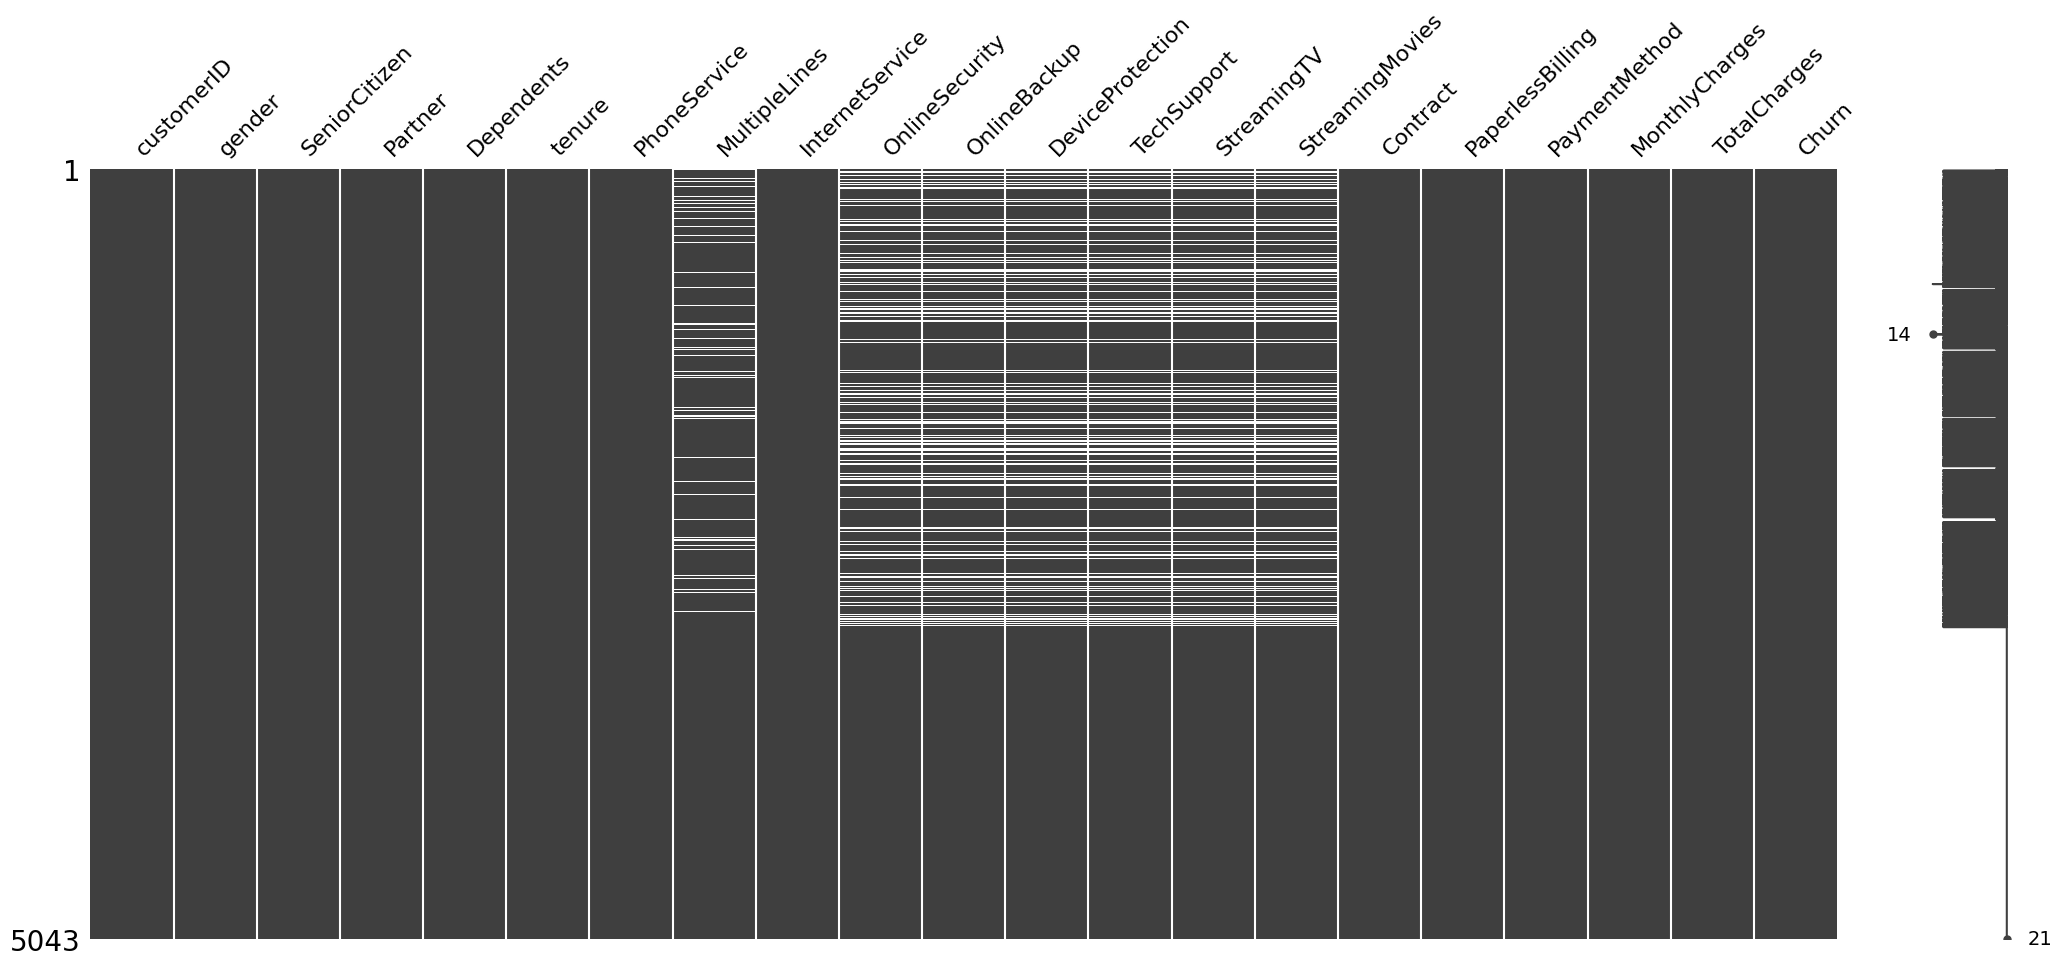

In [19]:
# Visualize missing data pattern using matrix plot
msno.matrix(master_df)

In [20]:
### Data Preprpcessing

In [21]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
master_df['TotalCharges'] = pd.to_numeric(master_df['TotalCharges'], errors='coerce')

In [22]:
# Verify the data type after conversion
master_df['TotalCharges'].dtype

dtype('float64')

In [23]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'MultipleLines': {True: 'Yes', False: 'No', None: 'No phone service'},
    'OnlineSecurity': {True: 'Yes', False: 'No', None: 'No internet service'},
    'OnlineBackup': {True: 'Yes', False: 'No', None: 'No internet service'},
    'DeviceProtection': {True: 'Yes', False: 'No', None: 'No internet service'},
    'TechSupport': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingTV': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingMovies': {True: 'Yes', False: 'No', None: 'No internet service'},
    'Churn': {True: 'Yes', False: 'No', None: 'No'},
    'Partner': {True: 'Yes', False: 'No'},
    'Dependents': {True: 'Yes', False: 'No'},
    'PaperlessBilling': {True: 'Yes', False: 'No'},
    'PhoneService': {True: 'Yes', False: 'No'},
    'SeniorCitizen': {True: 1, False: 0}  # Convert True to 1 and False to 0
}

In [24]:
# Replace old categories with te new ones
master_df.replace(new_cat_values_mapping, inplace=True)

In [25]:
# Confirm changes
check_unique_values(master_df)

Checking unique values in categorical columns:
gender ----> ['Female' 'Male']
Partner ----> ['Yes' 'No']
Dependents ----> ['No' 'Yes']
PhoneService ----> ['No' 'Yes']
MultipleLines ----> ['No phone service' 'No' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> ['No' 'Yes' 'No internet service']
OnlineBackup ----> ['Yes' 'No' 'No internet service']
DeviceProtection ----> ['No' 'Yes' 'No internet service']
TechSupport ----> ['No' 'Yes' 'No internet service']
StreamingTV ----> ['No' 'Yes' 'No internet service']
StreamingMovies ----> ['No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> ['Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ----> ['No' 'Yes']


In [26]:
# Check info after basic cleaning
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [27]:
# Descriptive statistics of the master_df dataset
master_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5035.000000
mean,0.162403,32.576641,65.090214,2302.062861
std,0.368857,24.529807,30.068133,2269.483576
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,417.675003
50%,0.000000,29.000000,70.550003,1401.150024
75%,0.000000,56.000000,90.050003,3862.000000
max,1.000000,72.000000,118.650002,8670.100000


The following was observed
***SeniorCitizen*** : The mean value of 0.162 suggests that approximately 16.24% of the customers in the dataset are senior citizens.The standard deviation of 0.369 indicates some variability in the distribution of senior citizen status among customers and the minimum value of 0 implies that there are non-senior customers in the dataset.

***Tenure*** : On average, customers stay with the service provider for approximately 32.58 months.The minimum tenure is 0 months, which could indicate newly acquired customers anf the maximum tenure is 72 months, indicating some customers have been with the provider for a significant period.The standard deviation of 24.53 suggests that there is a considerable variation in tenure lengths among customers.

***MonthlyCharges*** : The minimum monthly charge is $18.40, while the maximum is $118.65 and on average, customers are charged approximately $65.09 per month.The standard deviation of 30.07 indicates variability in monthly charges among customers.

***TotalCharges*** : On average, customers have been charged a total of approximately $2302.06 while The minimum total charge is $18.80, while the maximum is $8670.10. The standard deviation of $2269.48 suggests significant variability in total charges among customers.

### Univariate Analysis

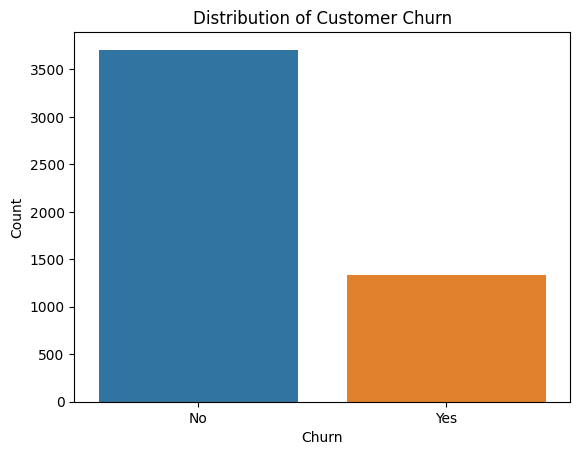

In [28]:
# Distribution of Churn
sns.countplot(x='Churn', data=master_df, color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])
plt.title("Distribution of Customer Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### **Exploring numerical columns**

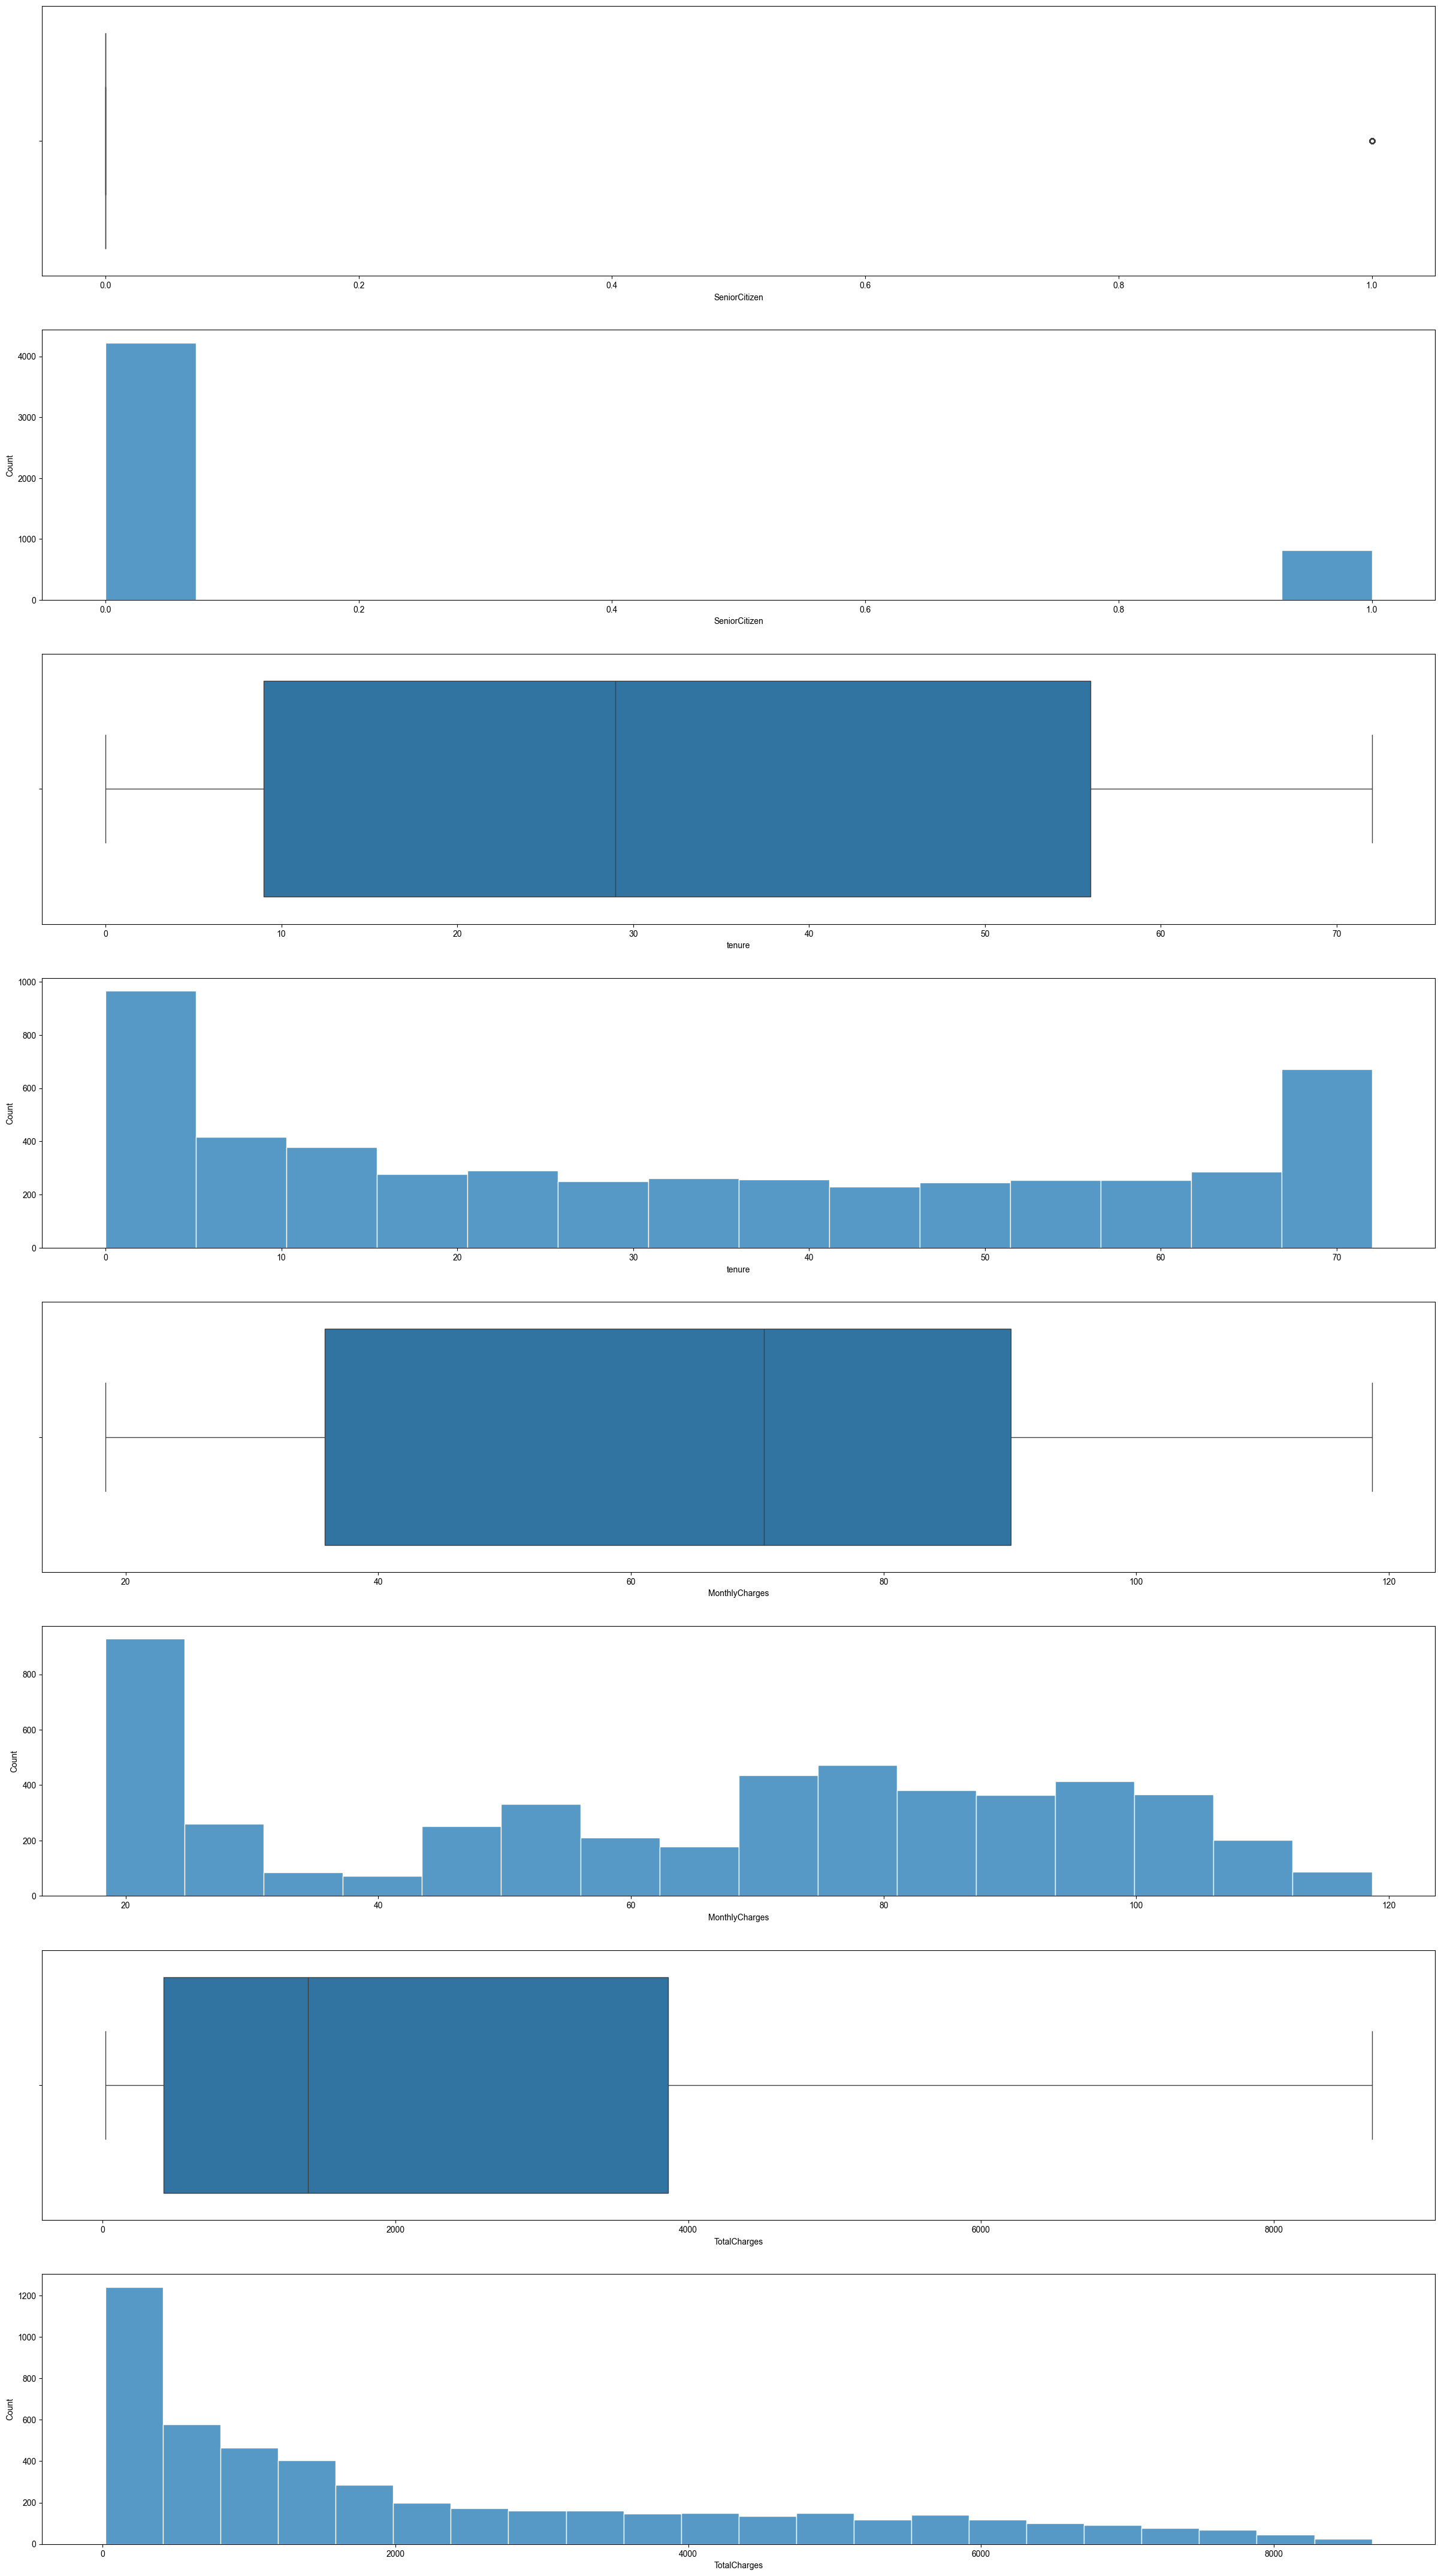

In [29]:
# Exploring the numerical features

fig, ax = plt.subplots(8, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=master_df, x="SeniorCitizen", ax=ax[0])
g=sns.histplot(data=master_df, x="SeniorCitizen", ax=ax[1])

g=sns.boxplot(data=master_df, x="tenure", ax=ax[2])
g=sns.histplot(data=master_df, x="tenure", ax=ax[3])


g=sns.boxplot(data=master_df, x="MonthlyCharges", ax=ax[4])
g=sns.histplot(data=master_df, x="MonthlyCharges", ax=ax[5])


g=sns.boxplot(data=master_df, x="TotalCharges", ax=ax[6])
g=sns.histplot(data=master_df, x="TotalCharges", ax=ax[7])

***Key Insights***

***Tenure*** : many customers stay less than 10 months with the company, however, there is a small spike in customers who are loyal enough to stay up to 72 months.

***MonthlyCharges*** : The monthly charges have a right skewed distribution, with a huge proportion of customers being charged around $20 - $25 monthly.

***TotalCharges*** : majority of TotalCharges ranges between 0 to 2000 dollars.

SeniorCitizen appears to be binary 

## **Exploring Categorical columns**

In [30]:

# Exploring Categorical columns 

categorical_variables = ['gender', 'Partner', 'Dependents',
                         'PhoneService', 'MultipleLines', 'InternetService',
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                         'PaymentMethod'
                        ]

# Create a figure with subplots for each categorical variable
fig, ax = plt.subplots(len(categorical_variables), figsize=(25, 400))

# Iterate over each categorical variable and its index
for index, category in enumerate(categorical_variables):
    # Plot the value counts of the categorical variable as a bar plot
    master_df[category].value_counts().plot(kind='bar', ax=ax[index], title=category) 


# Display the plots

plt.show()




In [31]:
#sns.countplot(master_df, x="PaymentMethod")
#plt.xticks(rotation=45)

#### **Key Insights**
***Genders*** : male customers are slightly higher than female customrs.

***Partner***: Customers with or without partners are about the same.

***Dependents*** : Seems we have more customers without dependent members than those who have.

***PhoneService*** : Also the majority of customers who don't have a phone service are way more than those who have.

***InternetService*** : Customers who have internet service, prefer mostly DSL or Fiber optic.

***MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport*** : There is a common pattern in these features indicating that most of the customers prefer not to have access to these features than those who do.

***StreamingMovies and StreamingTV***  have similar barplots, which means there is an equal amount of customers who prefer to either have or not have these services.

***Contract*** : In general customers prefer month-to-month contracts compared to other types such as two year or one year contracts.

***PaperlessBilling*** :  most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions with Electronic Check being the majority



### **Bivariate Analysis**

#### **Exploring Numeric variable columns with Churn**

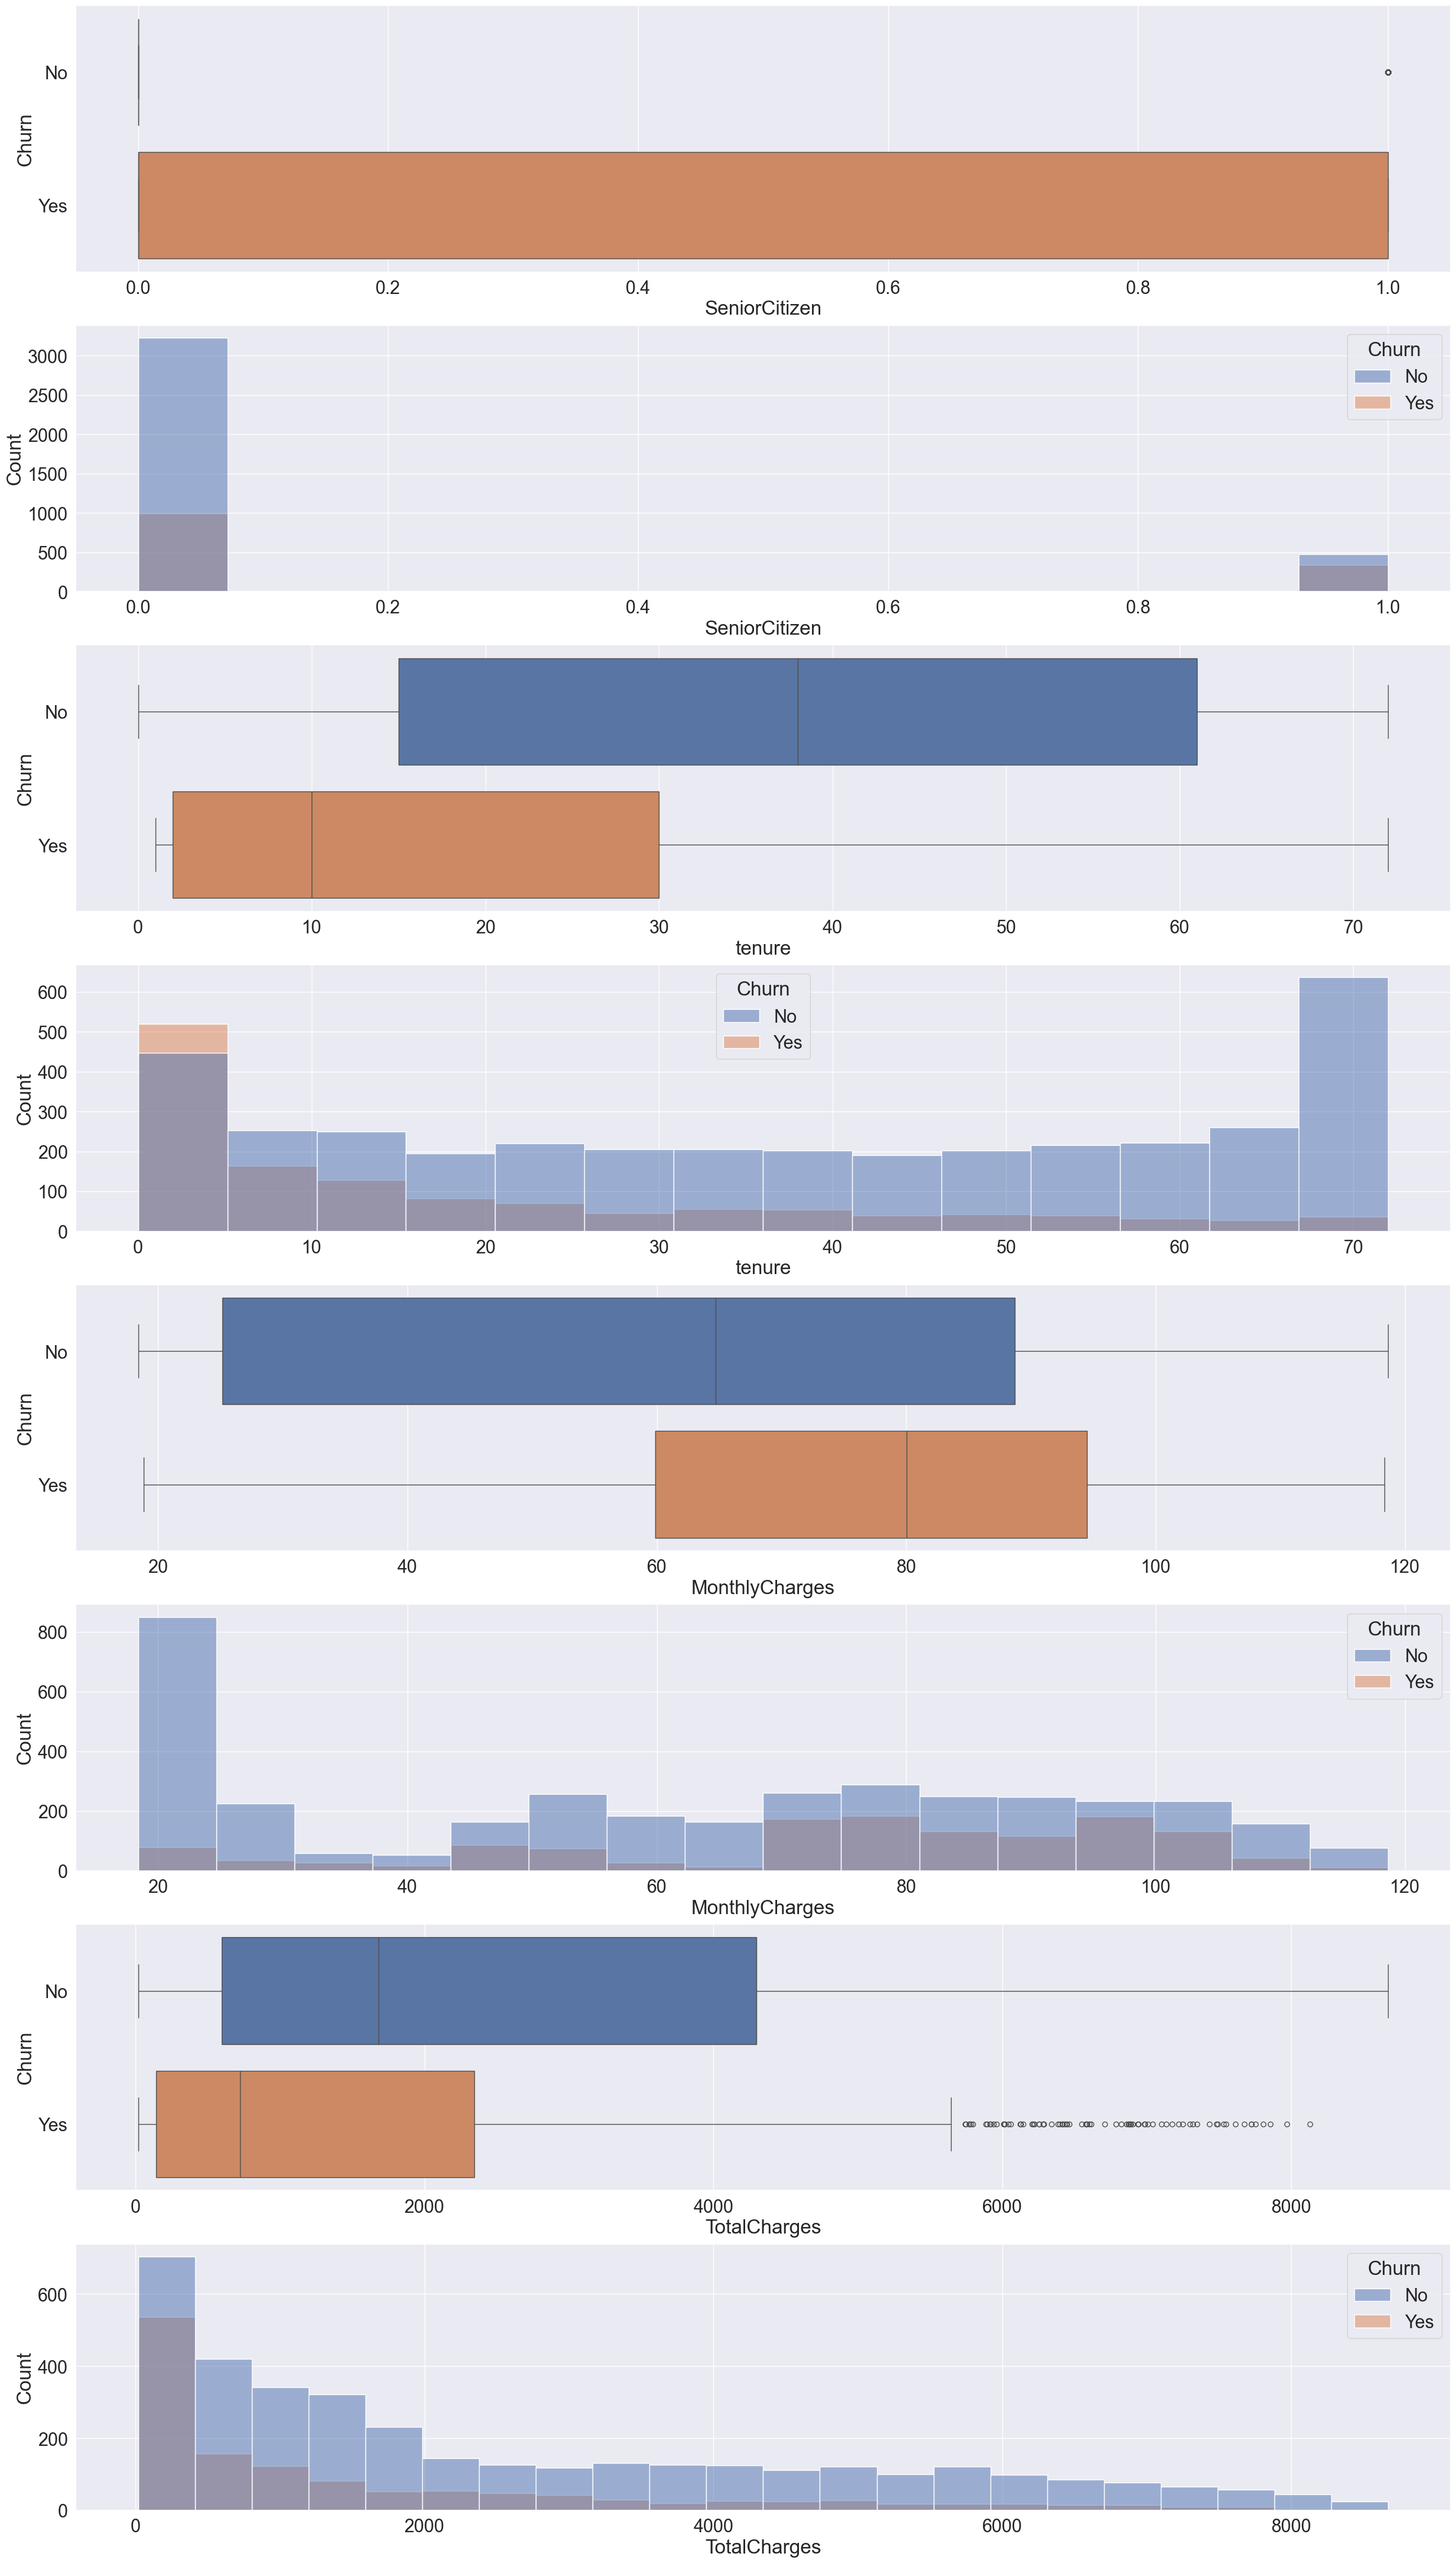

In [32]:
# Create a figure with 8 subplots arranged in a grid, with specified dimensions
fig, ax = plt.subplots(8, figsize=(30, 55))

# Set the font scale for seaborn plots to be 2
sns.set(font_scale=2)

# Plot SeniorCitizen data: boxplot and histogram
sns.boxplot(data=master_df, x="SeniorCitizen", y="Churn", ax=ax[0], hue="Churn")
sns.histplot(data=master_df, x="SeniorCitizen", ax=ax[1], hue="Churn")

# Plot tenure data: boxplot and histogram
sns.boxplot(data=master_df, x="tenure", y="Churn", ax=ax[2], hue="Churn")
sns.histplot(data=master_df, x="tenure", ax=ax[3], hue="Churn")

# Plot MonthlyCharges data: boxplot and histogram
sns.boxplot(data=master_df, x="MonthlyCharges", y="Churn", ax=ax[4], hue="Churn")
sns.histplot(data=master_df, x="MonthlyCharges", ax=ax[5], hue="Churn")

# Plot TotalCharges data: boxplot and histogram
sns.boxplot(data=master_df, x="TotalCharges", y="Churn", ax=ax[6], hue="Churn")
sns.histplot(data=master_df, x="TotalCharges", ax=ax[7], hue="Churn")

# Show the plots
plt.show()

#### **Key Insights**
For ***tenure*** and ***TotalCharges*** the Churn follows the same pattern as many customers leave very early and with small total charges when compared to the rest of their respective populations.

The opposite happens with the ***MonthlyCharges***, customers who Churn, leave the company when the monthly charges rises above 80 dollars

Since ***SeniorCitizen*** is binary not much can be gleened from the boxplot but the histogram indicates that a greater proprtion of younger customers did not churn as compared to older ones 


#### **Exploring Categorical columns with Churn**

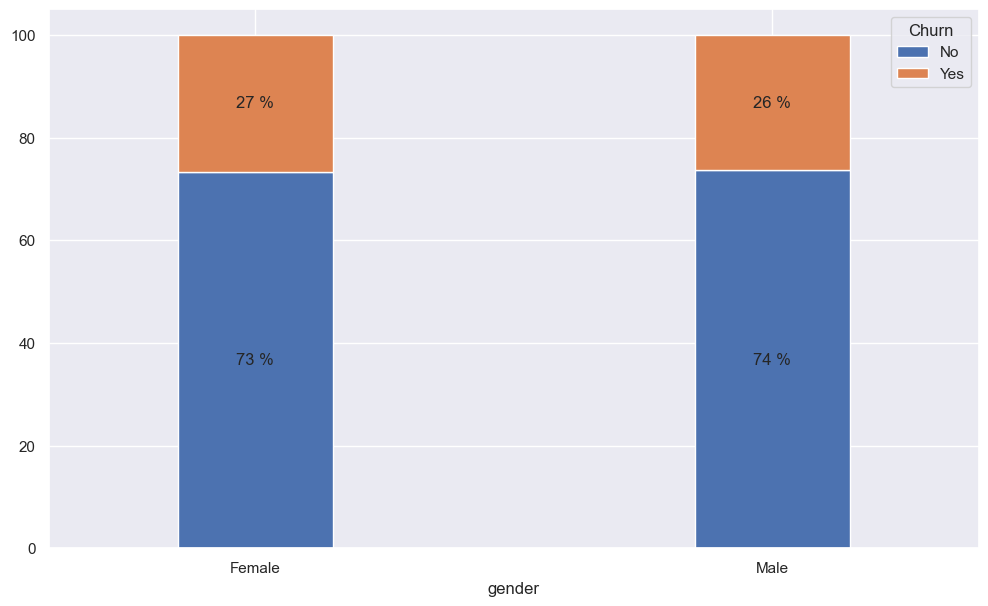

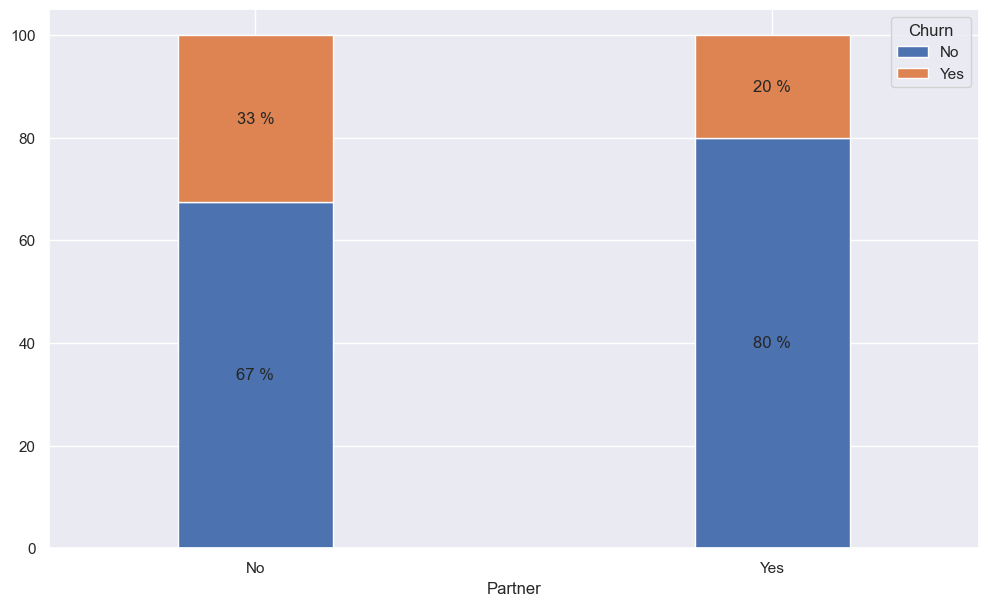

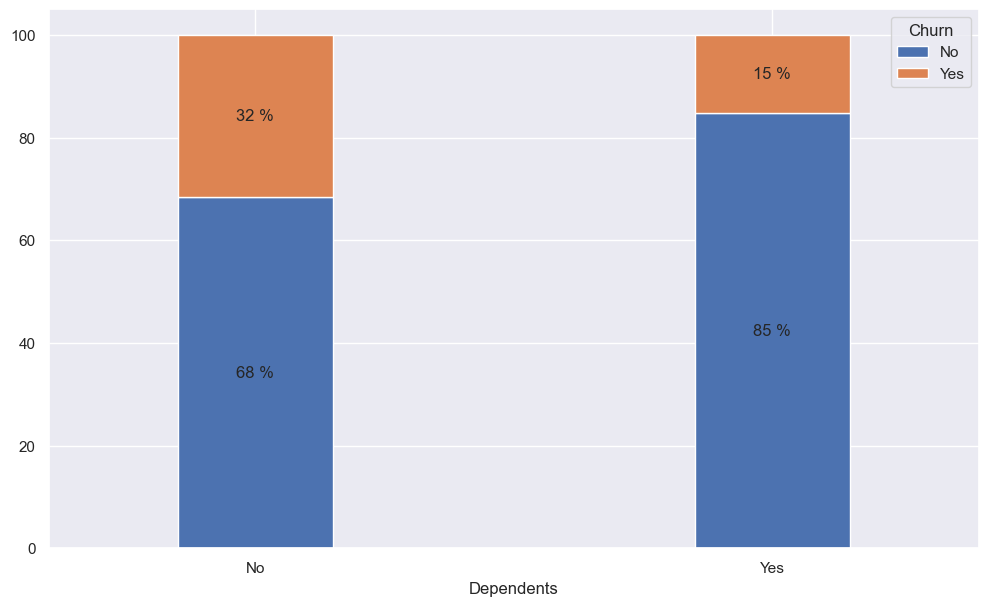

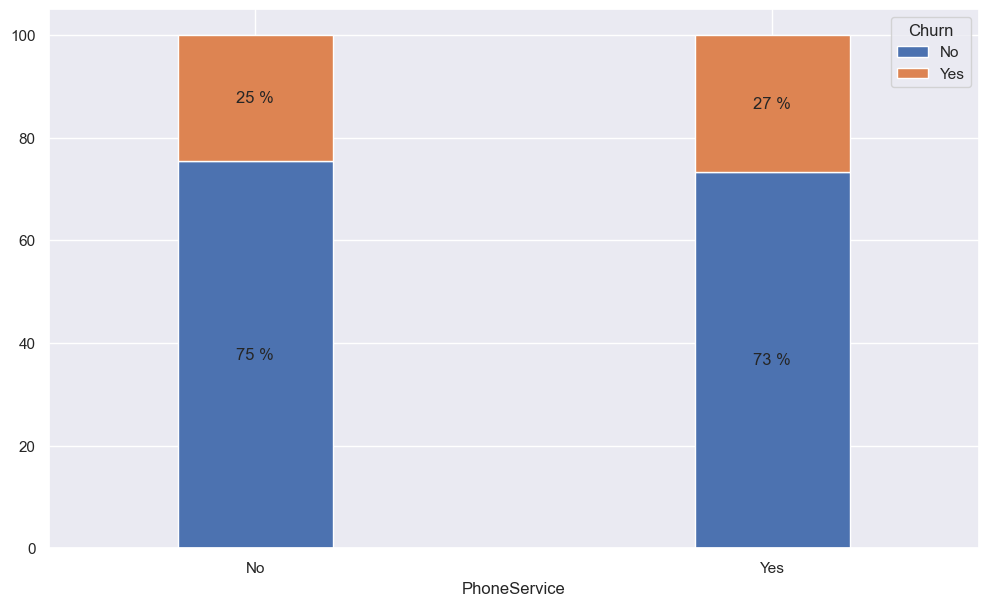

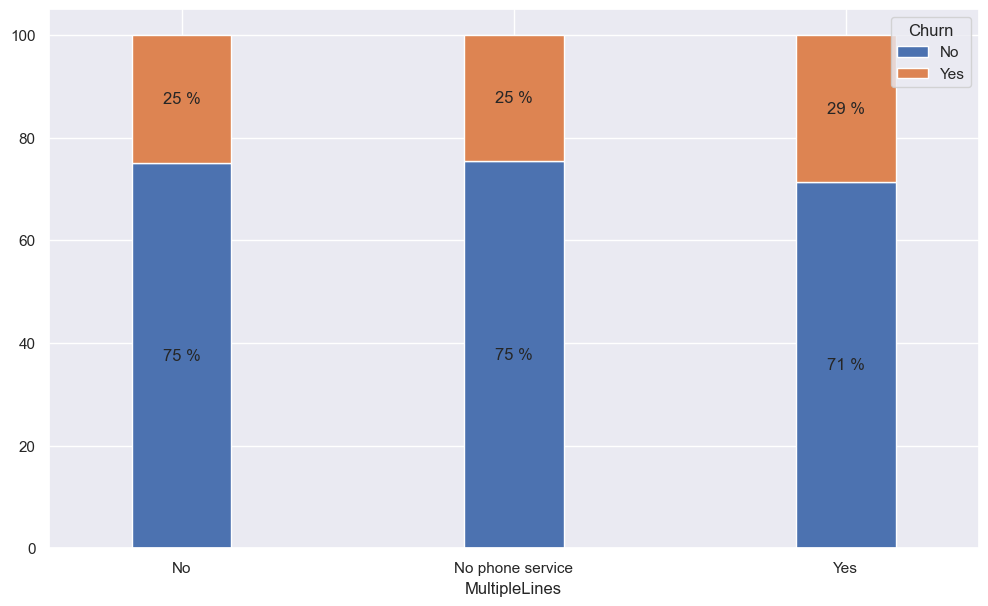

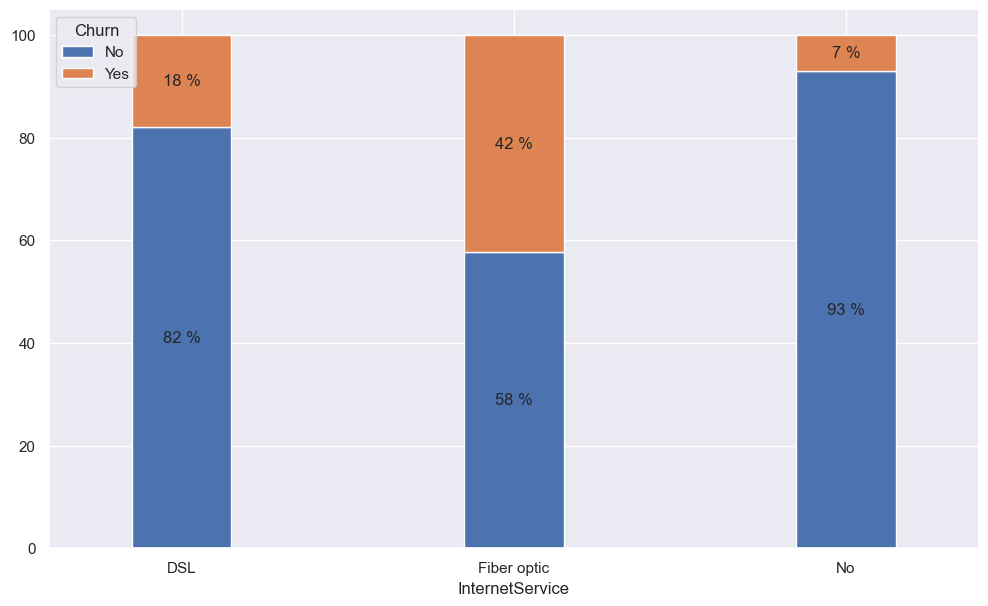

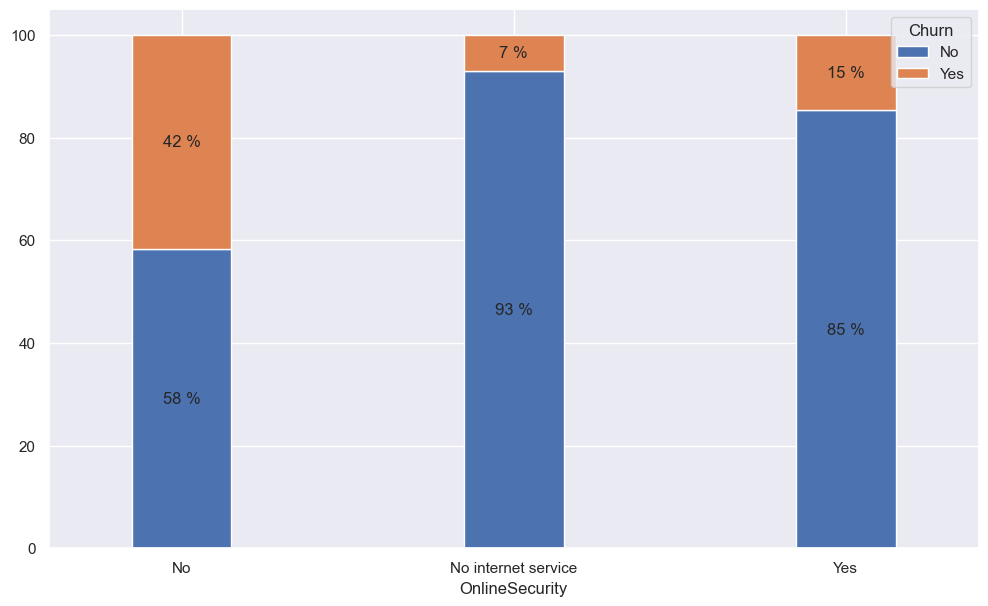

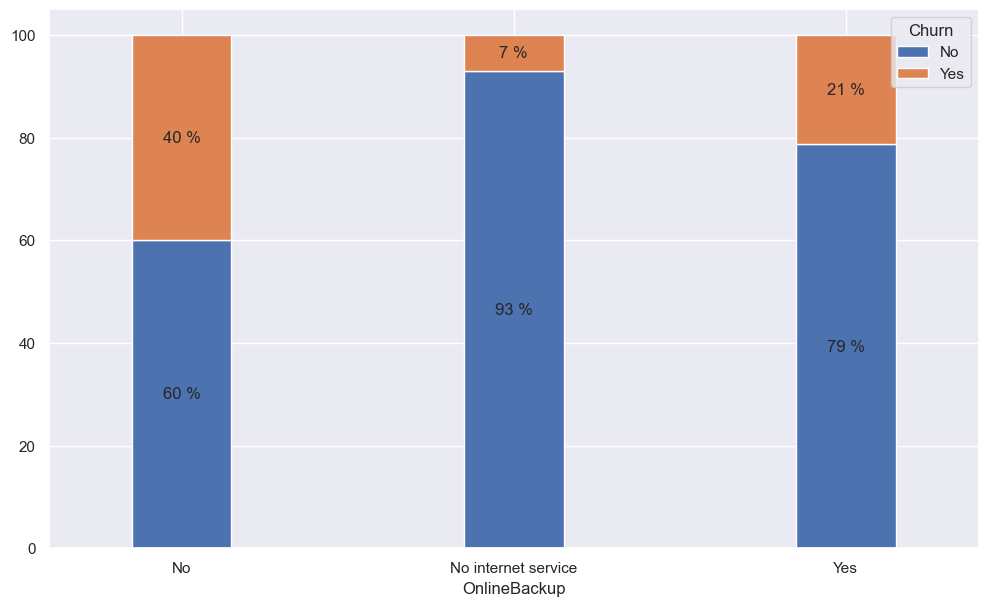

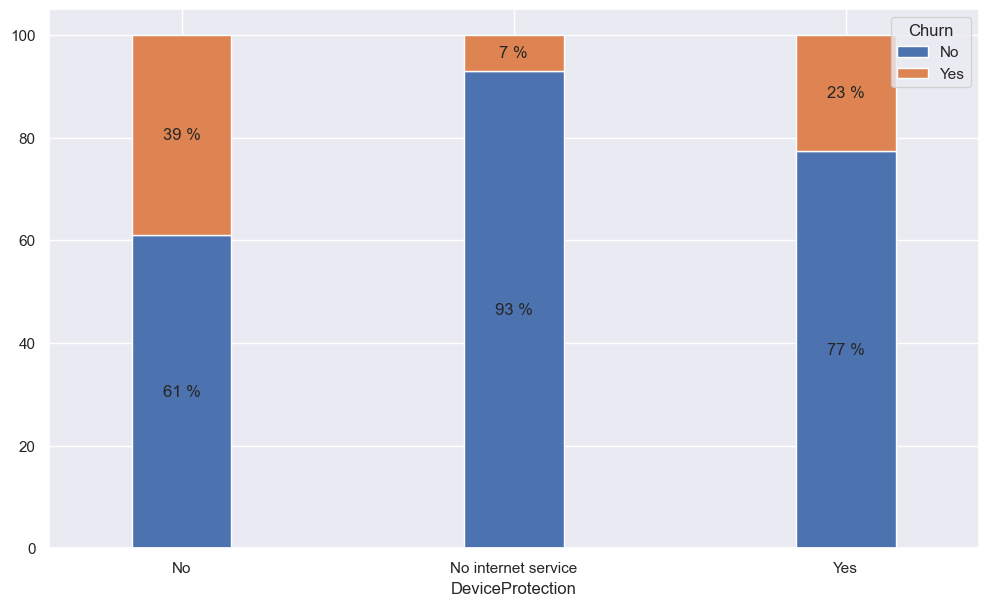

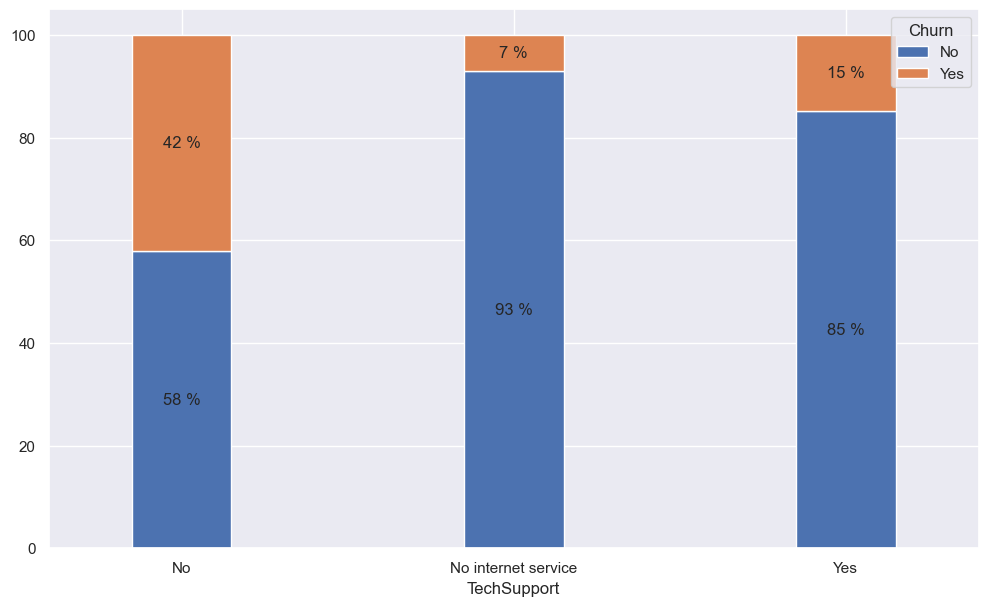

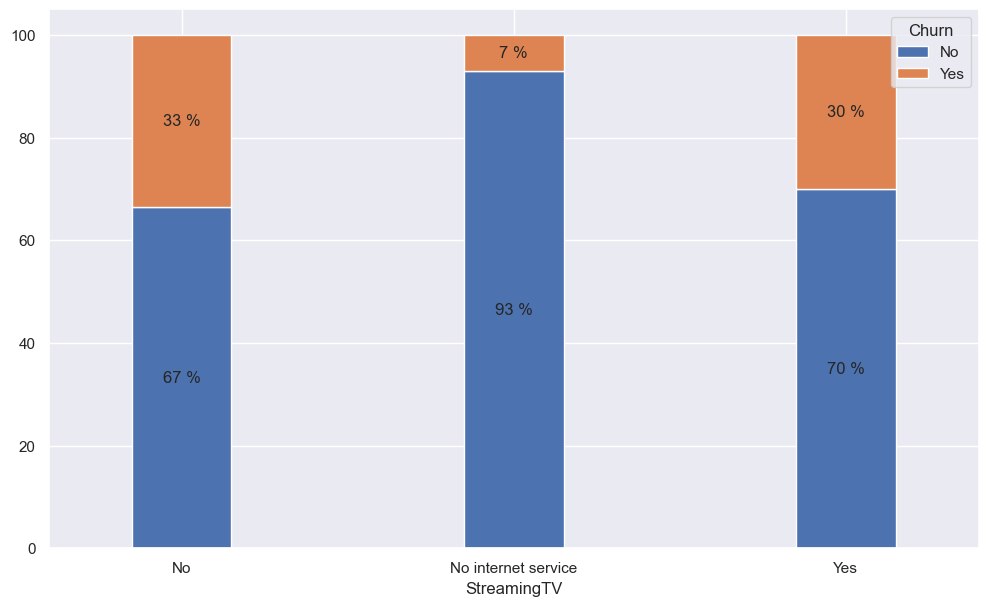

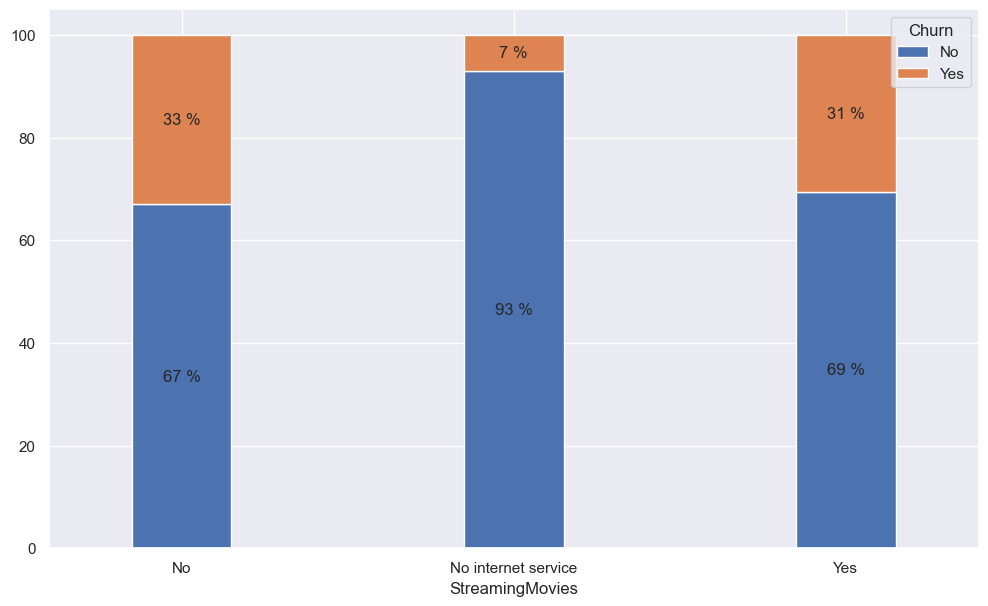

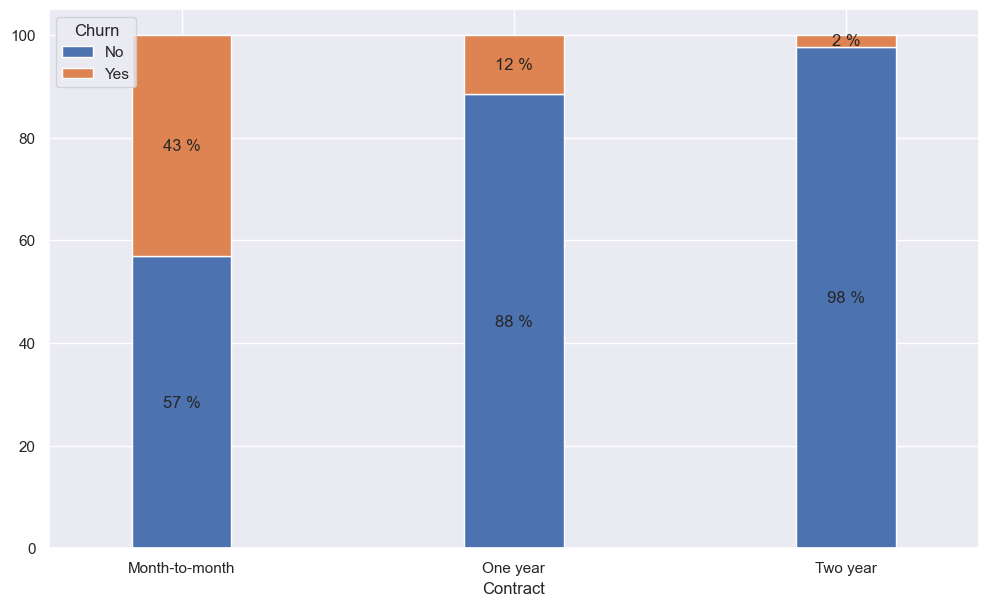

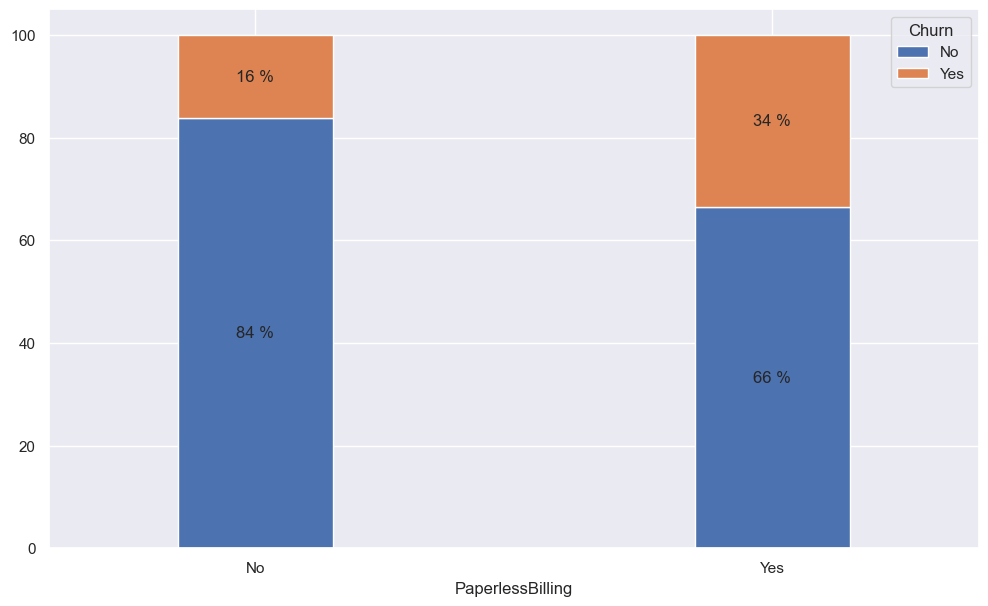

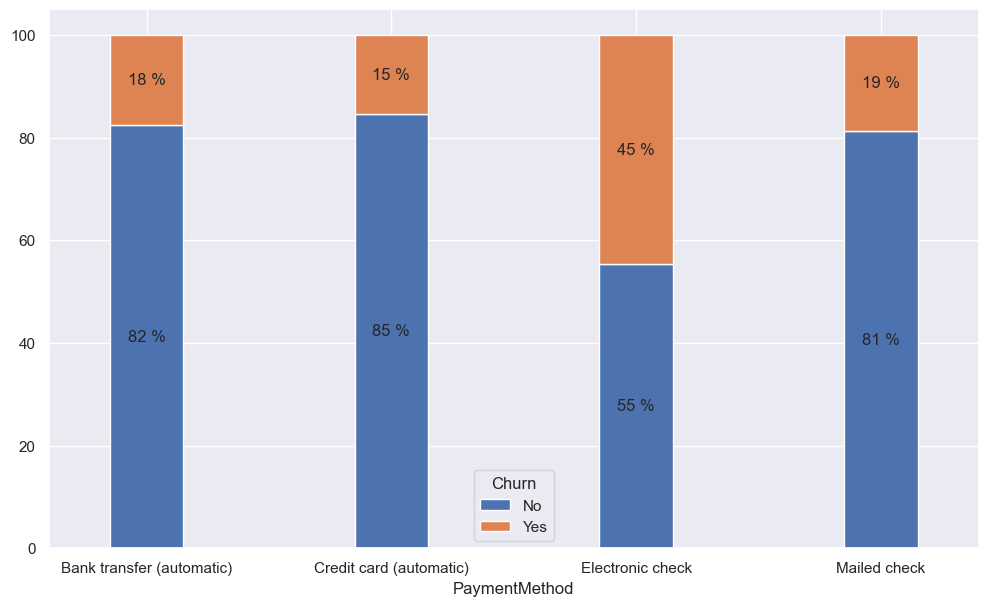

In [33]:
sns.set(font_scale=1)

for i in range(len(categorical_variables)):
    
    counts = master_df.groupby([categorical_variables[i],'Churn']).size().unstack()
    
    
    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

**Key Insights**

***Gender*** : both male and female customers have approximately the same  churn rates.

***Partners*** : customers who do not  have partners are more likely  to leave the company compared to those who do.

***Dependents*** : customers with depependants are more likely to churn than those with no dependants

***PhoneService and MultipleLines*** : Across these categories, customers show the same proportion for those who leave the company and those wo do not.

***InternetService*** :  customers who use fiber optic as InternetService, will leave the company at a higher rate  compared to DSL and and those with no internet service.

***OnlineSecurity, OnlineBackup, OnlineProtection, TechSupport*** : customers who do not use or do not have  any of these sevices  show higher probability to churn compared to the rest in their respective groups.

***Contract*** : customers with long contract durations are less likely to churn

***StreamingMovies and StreamingTV***  show the same churn rate

***PaperlessBilling*** : customers who prefer to have PaperlessBilling have higher Churn probability from those who don't.

***PaymentMethod*** : those who use ElectronicChecks for their transactions show great tedency to leave the company than those who use other methods of payment.

In [34]:
# Relationship between numeric columns
master_df.corr(numeric_only=True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


### Multivariate Analysis

#### **Data Quality Issues**

During the preliminary dataset exploration, several data quality issues were identified, and they are summarized below:


1. Accuracy:
   - Most of the categorical columns in the first DataFrame use True to represent Yes and False to represent No, creating inconsistency among the three datasets.


2. Validity:
   - In the second and third datasets, the TotalCharges column is of object data type instead of float, which should contain numerical values.


3. Consistency:
   - Inconsistent values in the categorical columns across the three data sets.

   
4. Completeness:
   - Missing data points in the Churn column (Target) and other columns in the first dataset.

#### **Business Questions**

**1. What is the proportion of customers who have churned versus those who have not churned?**

In [35]:
# Calculate the distribution of 'Churn' in the master_df dataset
churn_distribution = master_df['Churn'].value_counts().reset_index(name='Count')

# Calculate the percentage of each category
churn_distribution['Percentage'] = round((churn_distribution['Count'] / churn_distribution['Count'].sum()) * 100, 2)

# Print the distribution
print(churn_distribution)

# Plot the distribution with percentage
fig = px.bar(churn_distribution, 
             x='Churn', 
             y='Count', 
             color='Churn', 
             text='Percentage',  # Add percentage to hover text
             title='Churn Distribution with Percentage', 
             labels={'Count': 'Count', 'Churn': 'Churn', 'Percentage': 'Percentage (%)'}
             )


# Show plot
fig.show()


  Churn  Count  Percentage
0    No   3707       73.51
1   Yes   1336       26.49


The distribution of churn in the dataset shows that out of 5043 customers, 3707 (approximately 73.51%) have not churned (Churn = "No"), while 1336 customers (approximately 26.49%) have churned (Churn = "Yes"). 

This indicates that the majority of customers in the dataset have not churned, with a smaller proportion of customers having churned from the service.

The distribution of churn in the dataset reveals a problem of feature imbalance, where the majority of customers have not churned (Churn = "No") compared to the smaller proportion of customers who have churned (Churn = "Yes"). To address this issue appropriately, it will be handled during the data preprocessing stage by employing resampling technique. This ensures that the class imbalance is appropriately dealt with to avoid bias and improve the performance of the churn prediction model.

**2. How does the monthly charges vary between customers who have churned and those who have not?**

In [40]:
# Create a box plot to visualize the distribution of Monthly Charges across churned and non-churned customers
fig = px.box(master_df, x='Churn', y='MonthlyCharges', color='Churn', title='Distribution of Monthly Charges across Churn')

# Set the y-axis label for better clarity
fig.update_layout(yaxis_title='Monthly Charges')

# Display the plot
fig.show()

Overall, the box plot illustrates that the price of the monthly subscription (MonthlyCharges) plays a significant role in influencing customer churn. Customers with higher monthly charges are more likely to churn compared to those with lower charges. This discovery holds important implications for devising effective customer retention strategies and making informed pricing decisions within the Vodafone network service.

**3. How does the proportion of churn vary across different contract types (month-to-month, one year, two-year)?**

In [37]:
# Group the data by 'Contact' and 'Churn' columns and count the occurrences of each category combination
churn_by_contract = master_df.groupby(['Contract', 'Churn'])['Contract'].value_counts().reset_index(name='Count')

# Create a grouped bar plot to visualize the count of churned and non-churned customers
fig = px.bar(churn_by_contract, x='Contract', y='Count', color='Churn', barmode='group', title='Customer Churn by Contract Terms')

# Update layout
fig.update_layout(xaxis_title ='Contract', yaxis_title='Number of Customers')

# Show plot
fig.show()

The graph shows that the churn rate is highest for customers with month-to-month contracts. Of the 2744 customers with month-to-month contracts, 1184 have churned, for a churn rate of 43.1%. The churn rate is lower for customers with one-year contracts (11.6%) and two-year contracts (2.4%).

This suggests that customers with month-to-month contracts are more likely to churn than customers with one-year or two-year contracts. This could be because customers with month-to-month contracts are more likely to be dissatisfied with the service or because they are more likely to find a better deal from a competitor.

Table Representation

|Contract Type|Churn rate (in %)|
|---|---|
|Moth-to-month|43.1|
|One year| 11.6|
|Two year| 2.4|

The graph also shows that the majority of customers who churn have month-to-month contracts. Of the 1336 customers who have churned, 1184 have month-to-month contracts, 122 have one-year contracts, and 30 have two-year contracts.

**4. How does the presence or absence of internet service affect customer churn rates?**

In [43]:
# Group the data by 'OnlineBackup' and 'Churn' columns and count the occurrences of each category combination
churn_by_online_backup = master_df.groupby(['InternetService', 'Churn'])['InternetService'].value_counts().reset_index(name='Count')

# Create a grouped bar plot to visualize the count of churned and non-churned customers
fig = px.bar(churn_by_online_backup, x='InternetService', y='Count', color='Churn', barmode='group',  title='Customer Churn by Internet Service')

# Update plot layout to set the x and y axes title
fig.update_layout(xaxis_title='Internet Service', yaxis_title='Number of Customers')


# Show plot
fig.show()

The graph reveals that customers who use fiber optic as InternetService, will leave the company at a higher rate  compared to DSL and and those with no internet service.

**5. How does the type of internet service (DSL, Fiber Optic, None) influence monthly charges and customer churn?**

In [42]:
# Group the data by 'InternetService' and 'Churn' columns and calculate the sum of their monthly charges of each category combination
mon_charge_by_internet_service = master_df.groupby(['InternetService', 'Churn'])['MonthlyCharges'].sum().reset_index(name='MonthlyCharge')

# Create a grouped bar plot to visualize the monthly charge and count of churned and non-churned customers
fig = px.bar(mon_charge_by_internet_service, x='InternetService', y='MonthlyCharge', color='Churn', barmode='group', title='Monthly Charges and Churn Rate by InternetService Type')

# Update plot layout to set the x and y axes title
fig.update_layout(xaxis_title='Internet Service Type', yaxis_title='Monthly Charge')

# Show plot
fig.show()

The group bar graph shows that there is a significant difference in monthly charges between DSL and fiber optic customers. Fiber optic customers are paying an average a very high amount per month than DSL customers. This difference is likely due to the fact that fiber optic is a faster and more reliable internet service than DSL.

But the graph also reveals an interesting pattern, there is a significant difference in churn rates between DSL and fiber optic customers. Fiber optic customers are more likely to churn than DSL customers. This is likely because fiber optic customers are paying more for their service, so they are more likely to be dissatisfied with their service if it is not meeting their expectations.

Overall, the findings suggest that the type of internet service (DSL, fiber optic, or none) has a significant impact on monthly charges and customer churn. Fiber optic customers are paying significantly more for their service, but they are also more likely to churn. This suggests that businesses need to carefully consider the needs of their customers when deciding which type of internet service to offer.

#### **Hypothesis testing**

**Hypothesis testing***
****Null Hypothesis(H0):**** There is no significant relationship between the amount of monthly customer charges and customer churn.

****Alternative hypothesis(H1):**** There is a statistically significant relationship between the amount of monthly customer charges and customer churn.

****Since the distribution is not normal from the viusalisations, the test method used was Mann-Whitney U test****

In [36]:
# Split the data into two groups based on churn status
churned_yes = master_df[master_df['Churn'] == 'Yes']['MonthlyCharges']
churned_no = master_df[master_df['Churn'] == 'No']['MonthlyCharges']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_yes, churned_no, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant relationship between the amount of monthly customer charges and customer churn.")
else:
    print("Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.")

Mann-Whitney U statistic: 3100791.0
P-value: 1.2019873209608733e-42
Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.


# **Data Preparation**

<Axes: >

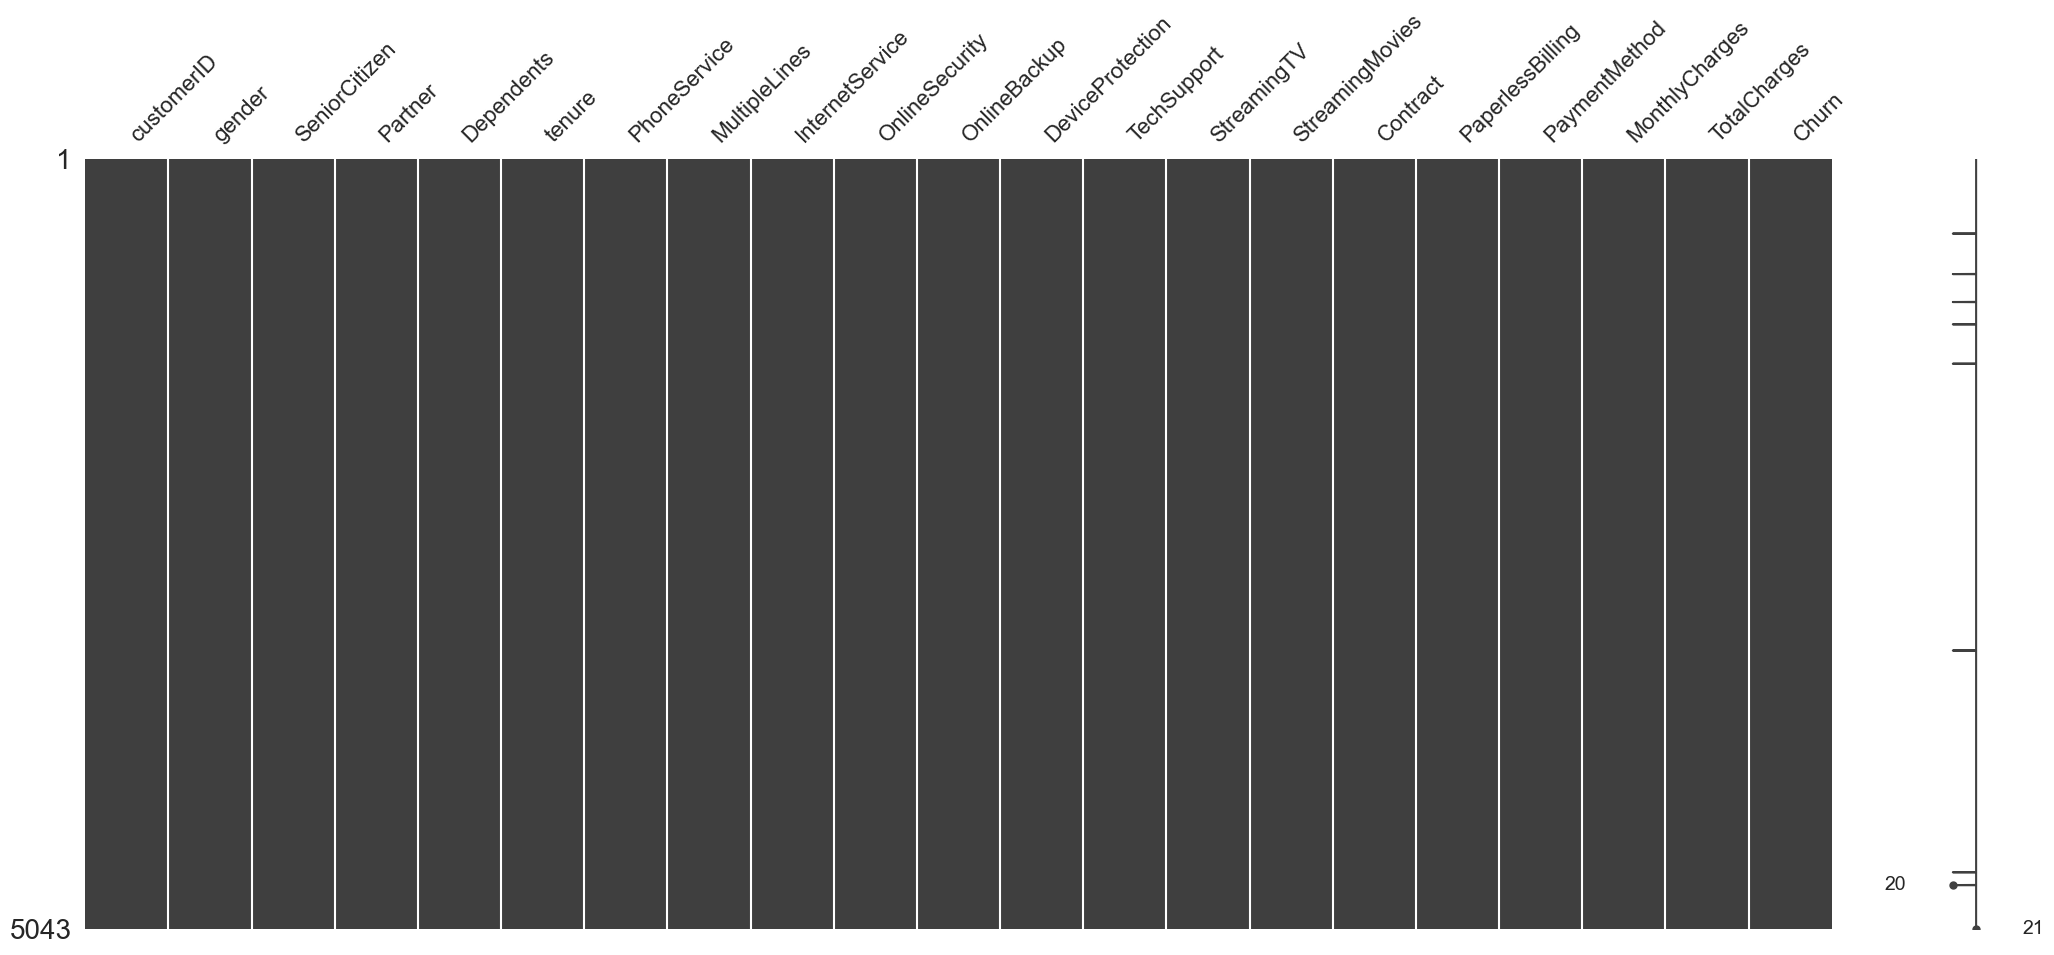

In [45]:
# Visualize missing data pattern using matrix plot
msno.matrix(master_df)

In [46]:
# Rechecking the missing value for the missing values in the TotalCharges column
master_df[np.isnan(master_df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


In [47]:
# Convert 'SeniorCitizen' to object type to avoid numeric encoding 
master_df['SeniorCitizen'] = master_df['SeniorCitizen'].astype('object')

#### Check if the dataset is balanced

In [48]:
class_distro = master_df['Churn'].value_counts().rename('Total').reset_index()
class_distro

,Churn,Total
0,No,3707
1,Yes,1336


In [49]:
class_distro['Ratio'] = class_distro['Total'].apply(lambda x: round((x/class_distro['Total'].sum() * 100), 2))
class_distro

,Churn,Total,Ratio
0,No,3707,73.51
1,Yes,1336,26.49


#### **Feature Selection**  

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


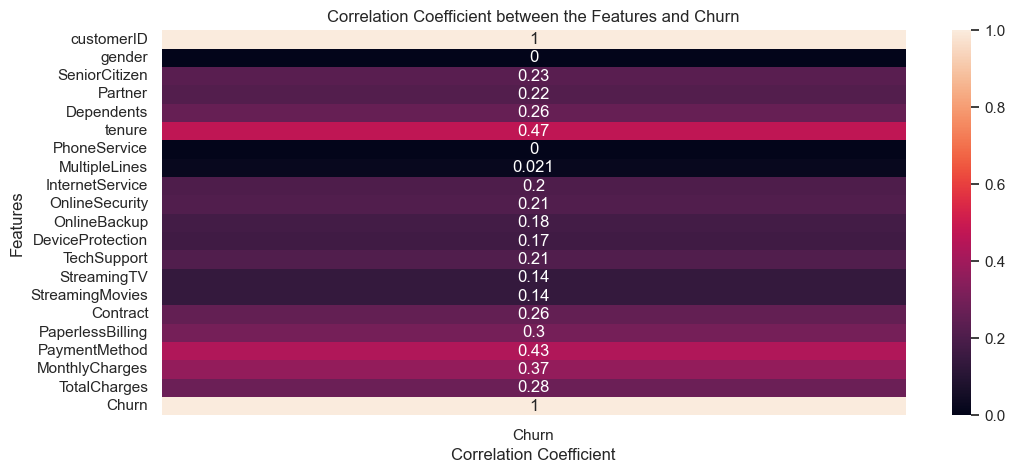

In [50]:
# Calculate the phik correlation matrix for the 'Churn' column
churn_corr = master_df.phik_matrix().loc['Churn']


# Set the figure size for the heatmap
plt.figure(figsize=(12, 5))

# Create a heatmap with annotations
sns.heatmap(churn_corr.to_frame(), annot=True)

# Set the title for the heatmap
plt.title('Correlation Coefficient between the Features and Churn')

# Set the labels for the y-axis and x-axis
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')

# Show the heatmap
plt.show()

#### **Split Dataset into Training and Evaluation** 

- X = input_data
- y = label

In [51]:
# Split data into X and y (train & evaluation)
X = master_df.drop(['customerID', 'Churn'], axis=1)
y = master_df['Churn']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
# Encode the y labels
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [53]:
#### Prepare Pipelines
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [54]:
numeric_columns = X.select_dtypes('number').columns
numeric_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [55]:
# Building the numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Building the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Combining the numeric and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numeric_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])


## **Modelling**

In [56]:
# Model selection 
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42)),
    ('Gradient_Boosting_Classifier', GradientBoostingClassifier(random_state=42)),
    ('Support_Vector_Machine', SVC(random_state=42,probability=True ))
    
]

#### **Train on Unbalanced Dataset**

In [57]:

all_pipeline = {}

metric_table =pd.DataFrame(columns=['model_name', 'accuracy',' precision', 'recall', 'f1_score'] )

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor and estimator
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier), 
    ])

   # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_pipeline dictinary
    all_pipeline[model_name] = final_pipeline

    # Predicting on test set
    y_pred = final_pipeline.predict(X_test)

    # Generate classification report for each pipeline or model
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    metric_table.loc[len(metric_table)] = [model_name, accuracy, precision, recall, f1]

metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
4,Gradient_Boosting_Classifier,0.803766,0.796621,0.803766,0.798997
1,Logistic_Regression,0.800793,0.796605,0.800793,0.798377
5,Support_Vector_Machine,0.802775,0.794504,0.802775,0.796916
3,Random_Forest,0.788900,0.779001,0.788900,0.781954
2,KNN,0.746283,0.747508,0.746283,0.746884
0,Decision_Tree,0.730426,0.744020,0.730426,0.736085


#### **Train on Balanced Dataset - Using the SMOTE**

In [58]:
# Create a place to hold trained models
all_balanced_pipelines = {}

# Create a data frame to store all models metrics
balanced_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
        ('classifier', classifier),
    ])

    # Applying SMOTE to the training data
    #X_train, y_train_encoded = smote.fit_resample(X_train, y_train_encoded)
    #pipeline=Pipeline(steps=steps)
    #X_train, y_train_encoded=pipeline.fit_resample(X_train, y_train_encoded)

    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Predicting on test set
    y_pred = balanced_pipeline.predict(X_test)

    # Generate classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

      # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)

    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name, accuracy, precision, recall, f1]

balanced_metric_table.sort_values(by='f1_score', ascending=False)

Report for Decision_Tree
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       742
           1       0.51      0.56      0.54       267

    accuracy                           0.74      1009
   macro avg       0.67      0.68      0.68      1009
weighted avg       0.75      0.74      0.75      1009

Report for Logistic_Regression
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       742
           1       0.59      0.63      0.61       267

    accuracy                           0.78      1009
   macro avg       0.73      0.74      0.73      1009
weighted avg       0.79      0.78      0.79      1009

Report for KNN
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       742
           1       0.50      0.62      0.55       267

    accuracy                           0.74      1009
   macro avg       0.68      0.70      0.68      1009
wei

,model_name,accuracy,precision,recall,f1_score
5,Support_Vector_Machine,0.793855,0.798588,0.793855,0.795951
4,Gradient_Boosting_Classifier,0.790882,0.792157,0.790882,0.791499
1,Logistic_Regression,0.784936,0.790126,0.784936,0.787236
3,Random_Forest,0.781962,0.775285,0.781962,0.777949
0,Decision_Tree,0.743310,0.750652,0.743310,0.746589
2,KNN,0.735382,0.757981,0.735382,0.743678


**Insights**:

* Balancing the dataset with SMOTE has positively impacted the models, particularly in their ability to identify customers who will churn (improved recall for 'Yes').

* The Support_Vector_Machine, Gradient_Boosting_Classifier, and Logistic_Regression stand out as models with balanced improvements in precision and recall for the 'Yes' class.

* F1 score is measures a model's accuracy through combines the precision and recall scores of the model. Based on the F1 score, the three best perfoming models are: Support_Vector_Machine with a score of 	0.795951, Gradient_Boosting_Classifier with 0.791499, and Logistic_Regression with a score of 0.787236. 


#### **Feature Importance and Selection**

In [59]:
# Create a place to hold trained models
all_balanced_pipelines = {}

# Add confusion matrix to all pipeline
all_confusion_matrix = {}

# Create a data frame to store all models metrics
balanced_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])

    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Predicting on test set
    y_pred = balanced_pipeline.predict(X_test)

    # Generate all matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Add all pipelines into the all_pipeline dictionary
    all_confusion_matrix[model_name] = conf_matrix

    # Generate classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name, accuracy, precision, recall, f1]

balanced_metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
5,Support_Vector_Machine,0.793855,0.798588,0.793855,0.795951
4,Gradient_Boosting_Classifier,0.790882,0.792157,0.790882,0.791499
1,Logistic_Regression,0.784936,0.790126,0.784936,0.787236
3,Random_Forest,0.781962,0.775285,0.781962,0.777949
0,Decision_Tree,0.743310,0.750652,0.743310,0.746589
2,KNN,0.735382,0.757981,0.735382,0.743678


## **Evaluation**

#### **Cross-Validation**

In [83]:

# Create an empty DataFrame to store cross-validation results
cross_val_table = pd.DataFrame(columns=['Model', 'Cross_Validation_Scores'])

# Define k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor, SMOTE, feature selection, and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(balanced_pipeline, X_train, y_train_encoded, cv=k_fold, scoring='f1_weighted')

    # Add cross-validation scores to DataFrame
    mean_cv_score = cv_scores.mean()
    
    cross_val_table.loc[len(cross_val_table)] = [model_name, cv_scores]

# Create a DataFrame to store the mean cross-validation scores
score_df = pd.DataFrame(columns=['Model', 'Mean_CV_Score'])

for index, row in cross_val_table.iterrows():
    model_name = row['Model']
    mean_cv_score = row['Cross_Validation_Scores'].mean()
    score_df.loc[len(score_df)] = [model_name, mean_cv_score]

# Display the DataFrame
score_df.sort_values(by='Mean_CV_Score', ascending=False)

,Model,Mean_CV_Score
4,Gradient_Boosting_Classifier,0.801668
5,Support_Vector_Machine,0.796194
1,Logistic_Regression,0.795983
3,Random_Forest,0.785210
2,KNN,0.754658
0,Decision_Tree,0.728881


**Insight**

* The results of the Cross-Validation indicate that the best best performing model is Gradient_Boosting_Classifier. This is closely followed by Support_Vector_Machine and Logistic_Regression.

#### **Visualise Evaluation Using ROC - AUC**

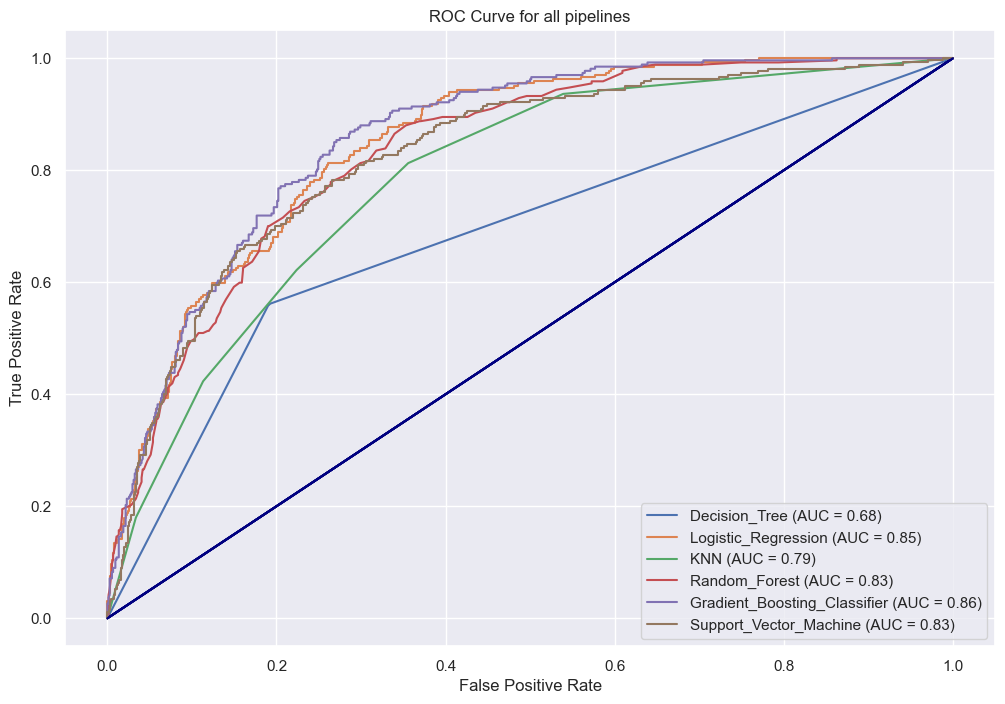

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))

# Add confusion matrix to all pipeline
all_confusion_matrix = {}

all_roc_data = {}

for model_name, pipeline in all_balanced_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], color='navy', linestyle='-')

    # Set labels and title
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve for all pipelines')

# Add legend to the plot
ax.legend(loc='lower right')

# Show the plot after the for loop
plt.show()


**Insight**

* The result of the visualization of the ROC-AUC confirms the cross-validation result with Gradient_Boosting_Classifier as the best performing model. However Logistic_Regression outperforms Support_Vector_Machine

In [84]:
all_roc_data = LogisticRegression

In [65]:
gradient_pipeline = all_balanced_pipelines['Gradient_Boosting_Classifier']
gradient_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncode...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x00000287D6476320>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

#### **Confusion Matrix**

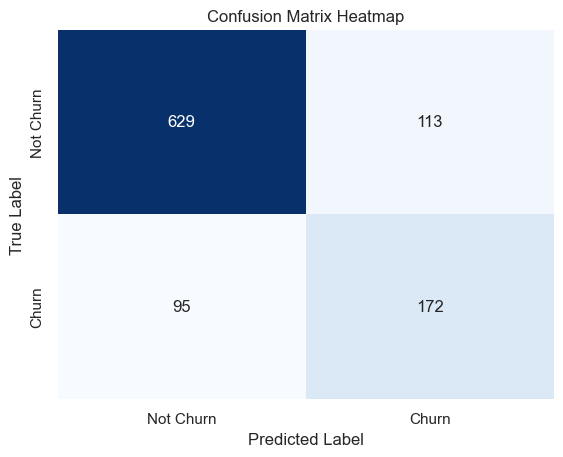

In [85]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Display the heatmap
plt.show()

In [66]:
threshold = 0.18

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

binary_predictions = (y_pred_proba > threshold).astype(int)

threshold_metrics = confusion_matrix(y_test_encoded, binary_predictions)
threshold_metrics

array([[507, 235],
       [ 48, 219]], dtype=int64)

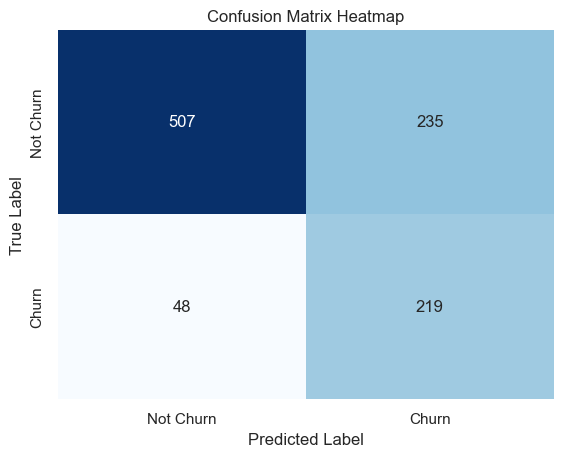

In [87]:
sns.heatmap(data=threshold_metrics, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Display the heatmap
plt.show()

#### **Hyper-parameter Tuning**

#### Logistic Regression

In [90]:
# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
}

# Create the logistic regression model
logistic_classifier = LogisticRegression(random_state=42)

# Create the pipeline with the preprocessor and logistic regression model
logistic_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
    ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
    ('classifier', logistic_classifier)
])

# Create the grid search object
grid_search = GridSearchCV(logistic_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters are: {best_hyperparameters}")
print(f"Best score is {best_score}")



 

Best hyperparameters are: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best score is 0.7974727954221899


In [91]:
best_parameters = grid_search.best_params_

Retrain Model With Best Parameters

In [92]:
logistic_pipeline.set_params(**best_parameters)
logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncode...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x00000287D6476320>)),
                ('classifier',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

#### Gradient Boosting Classifier

In [98]:
# Define the parameter grid for Grid Search
param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    
}

# Create the logistic regression model
gradient_classifier = GradientBoostingClassifier(random_state=42)

# Create the pipeline with the preprocessor and logistic regression model
gradient_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
    ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
    ('classifier', gradient_classifier)
])

# Create the grid search object
grid_search = GridSearchCV(gradient_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters are: {best_hyperparameters}")
print(f"Best score is {best_score}")

Best hyperparameters are: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Best score is 0.8039179511778146


In [99]:
best_parameters = grid_search.best_params_

Retrain Model With Best Parameters

In [100]:
gradient_pipeline.set_params(**best_parameters)
gradient_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncode...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x00000287D6476320>)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=300,
                                            random_state=42))])

#### **Test the model**

In [68]:
# Load the test data
test_df = pd.read_excel("Data/Telco-churn-last-2000.xlsx")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [69]:
# Convert 'SeniorCitizen' to object type to avoid numeric encoding 
test_df['SeniorCitizen'] = test_df['SeniorCitizen'].astype('object')

In [70]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

In [71]:
# Making predctictions
predictions = gradient_pipeline.predict(test_df)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [72]:
# Inverse transform the result
encoder.inverse_transform(predictions)

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

#### **Persit the model**

In [73]:
#joblib.dump(gradient_pipeline, 'gradient_pipeline.joblib')

In [74]:
for modelname, pipeline in all_balanced_pipelines.items():
    joblib.dump(pipeline, f'./models/{modelname}.joblib')

joblib.dump(encoder, './models/encoder.joblib')

['./models/encoder.joblib']

**Recommendations**

1. **Tailor Pricing Strategies:** The analysis reveals that higher monthly charges are associated with an increased likelihood of customer churn. To enhance customer retention, Vodafone can explore competitive pricing strategies that balance revenue generation with customer satisfaction, ensuring that the cost aligns with the value perceived by customers.

2. **Enhance Early Customer Experience:** Early months of customer tenure exhibit a higher churn rate, suggesting that customer experience in the initial stages is vital. Focusing on improving onboarding processes, service quality, and addressing customer concerns during this crucial period can enhance customer satisfaction and loyalty.

3. **Promote Long-Term Contracts:** The analysis indicates that customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. Encouraging customers to opt for longer-term contracts through incentives and benefits can potentially reduce churn rates and foster customer commitment.

4. **Leverage Additional Services:** The presence of Online Security and Online Backup services has shown to impact churn rates. Strategically promoting and enhancing these services can play a role in reducing churn rates by providing value-added features that address customer needs and concerns.

5. **Monitor and Adjust Fiber Optic Offering:** Given the higher monthly charges and elevated churn rate among Fiber Optic customers, closely monitor customer satisfaction and service quality for this group. Continuously fine-tune offerings and support to ensure that the premium cost of Fiber Optic service aligns with customer expectations.

6. **Personalized Customer Engagement:** Utilize customer insights from the churn analysis to develop personalized engagement strategies. Tailored communication, offers, and targeted marketing campaigns based on customer tenure, contract type, and service preferences can enhance customer loyalty and mitigate churn.